1. Выбор набора данных

In [ ]:
from google.colab import files
#files.upload()

import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
print("Пропущенные значения\n", df.isnull().sum())
df.head(5)



Пропущенные значения
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


2.	Построение моделей и оценка значимости признаков
•	Построение линейной модели:
•	Использовать критерий значимости признаков (p-value или веса).


In [ ]:
import statsmodels.api as sm

#Предположим что целевая переменная это DEATH_EVENT
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

#Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Добавление интерсепта
X_scaled_p = sm.add_constant(X_scaled)

#Линейная модель
model = sm.OLS(y, X_scaled_p).fit()
print(model.summary())

#Возьмем p уровень за 0.05, если признак выше, то считаем его незначимым
s_f = ['age', 'ejection_fraction', 'serum_creatinine', 'time'] #Значимыые признаки
X_f = df[s_f]
#X_f.head(5)

#X_f = sm.add_constant(X_f)
#new_model = sm.OLS(y, X_f).fit()
#print(new_model.summary())
#Видим, что параметры модели не сильно ухудшились (было R^2 0.417, стало 0.402)

                            OLS Regression Results                            
Dep. Variable:            DEATH_EVENT   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     17.04
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           2.35e-27
Time:                        07:47:18   Log-Likelihood:                -115.90
No. Observations:                 299   AIC:                             257.8
Df Residuals:                     286   BIC:                             305.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3211      0.021     15.229      0.0

•	Применить жадный алгоритм отбора признаков.

Добавлен признак: time, R^2: 0.2776908
Добавлен признак: ejection_fraction, R^2: 0.3386151
Добавлен признак: serum_creatinine, R^2: 0.3856060
Добавлен признак: age, R^2: 0.4024757
Добавлен признак: serum_sodium, R^2: 0.4071482
Добавлен признак: creatinine_phosphokinase, R^2: 0.4115633
Добавлен признак: sex, R^2: 0.4159061
Добавлен признак: diabetes, R^2: 0.4162779
Добавлен признак: platelets, R^2: 0.4166093
Добавлен признак: high_blood_pressure, R^2: 0.4168048
Добавлен признак: smoking, R^2: 0.4168283
Добавлен признак: anaemia, R^2: 0.4168362

Ранжирование признаков:
1. time (R^2: 0.2776908)
2. ejection_fraction (R^2: 0.3386151)
3. serum_creatinine (R^2: 0.3856060)
4. age (R^2: 0.4024757)
5. serum_sodium (R^2: 0.4071482)
6. creatinine_phosphokinase (R^2: 0.4115633)
7. sex (R^2: 0.4159061)
8. diabetes (R^2: 0.4162779)
9. platelets (R^2: 0.4166093)
10. high_blood_pressure (R^2: 0.4168048)
11. smoking (R^2: 0.4168283)
12. anaemia (R^2: 0.4168362)


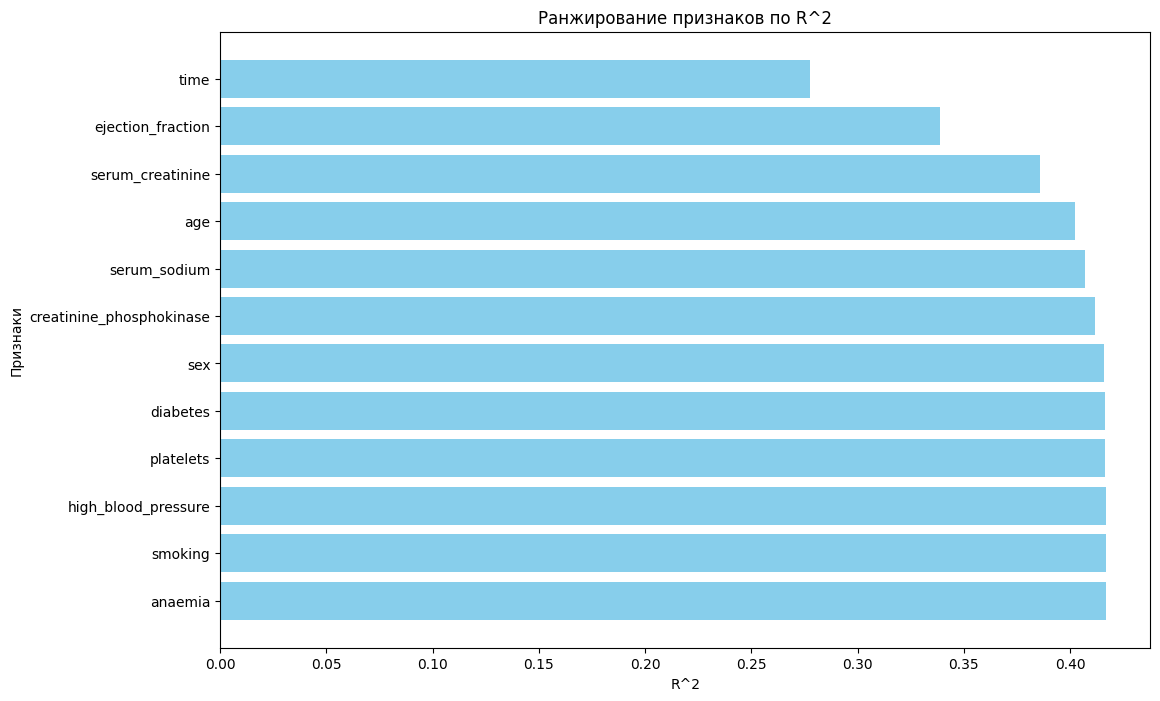

In [ ]:
import matplotlib.pyplot as plt

feature_names = X.columns.tolist()

# Жадный алгоритм для ранжирования всех признаков
sel_feature = []
r_feature = feature_names.copy()
feature_ranking = []
r2_scores = []

while r_feature:
    scores = {}

    for f in r_feature:
        cur_feature = sel_feature + [f]
        X_temp = pd.DataFrame(X_scaled, columns=feature_names)[cur_feature]
        X_temp = sm.add_constant(X_temp)

        model_temp = sm.OLS(y, X_temp).fit()
        scores[f] = model_temp.rsquared

    best_feature = max(scores, key=scores.get)
    sel_feature.append(best_feature)
    r_feature.remove(best_feature)
    feature_ranking.append(best_feature)
    r2_scores.append(scores[best_feature])
    print(f"Добавлен признак: {best_feature}, R^2: {scores[best_feature]:.7f}")

print("\nРанжирование признаков:")
for rank, (feature, r2) in enumerate(zip(feature_ranking, r2_scores), 1):
    print(f"{rank}. {feature} (R^2: {r2:.7f})")

plt.figure(figsize=(12, 8))
plt.barh(feature_ranking, r2_scores, color='skyblue')
plt.xlabel('R^2')
plt.ylabel('Признаки')
plt.title('Ранжирование признаков по R^2')
plt.gca().invert_yaxis()
plt.show()


•	Модель с Lasso-регуляризацией.
•	Оценить влияние параметра alpha на зануление признаков

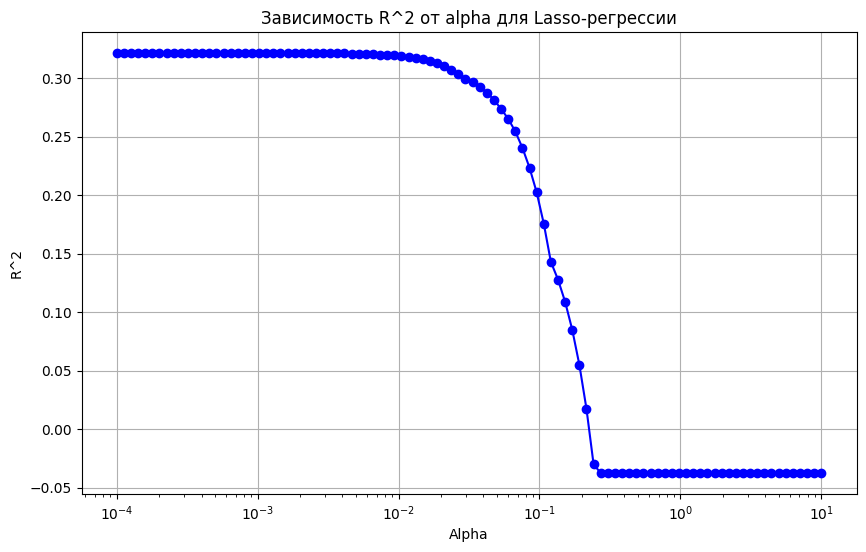

R^2: 0.2494
Среднеквадратичная ошибка: 0.1824
Коэффициенты модели с Lasso:
age                         0.031860
anaemia                    -0.000000
creatinine_phosphokinase    0.000000
diabetes                    0.000000
ejection_fraction          -0.057255
high_blood_pressure        -0.000000
platelets                  -0.000000
serum_creatinine            0.073178
serum_sodium               -0.000000
sex                        -0.000000
smoking                    -0.000000
time                       -0.174383
dtype: float64


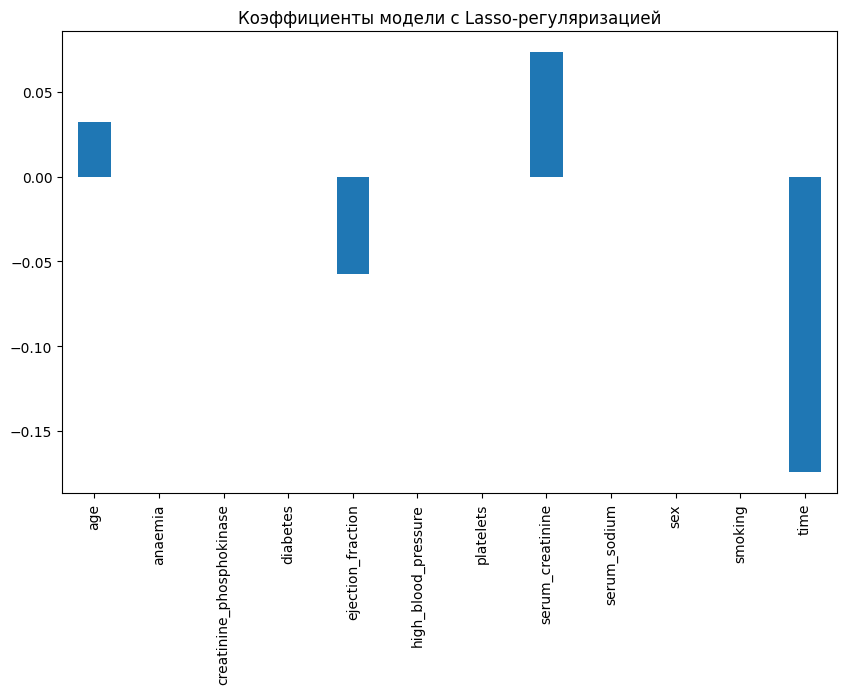

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Лассо
alpha_values = np.logspace(-4, 1, 100)
r2_scores = []

#Перебор а коэфф, чтобы посмотреть на графике где меньше всего занулений
for alpha in alpha_values:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_scaled, y)
  y_pred = lasso.predict(X_test)
  r2_scores.append(r2_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, r2_scores, marker='o', color='b')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.title('Зависимость R^2 от alpha для Lasso-регрессии')
plt.grid(True)
plt.show()
#Лучший коэфф а между 10^-2 и 10^-1, тк начинает снижаться после стабильности

#Строим лассо с лучшим коэфф
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

print(f"R^2: {r2_score(y_test, y_pred):.4f}")
print(f"Среднеквадратичная ошибка: {mean_squared_error(y_test, y_pred):.4f}")
coef = pd.Series(lasso.coef_, index=X.columns)
print("Коэффициенты модели с Lasso:")
print(coef)
coef.plot(kind='bar', figsize=(10, 6))
plt.title("Коэффициенты модели с Lasso-регуляризацией")
plt.show()

•	Построение моделей на основе деревьев решений:
•	Случайный лес


Точность модели на тестовых данных: 0.7500

Классификационный отчет:
               precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



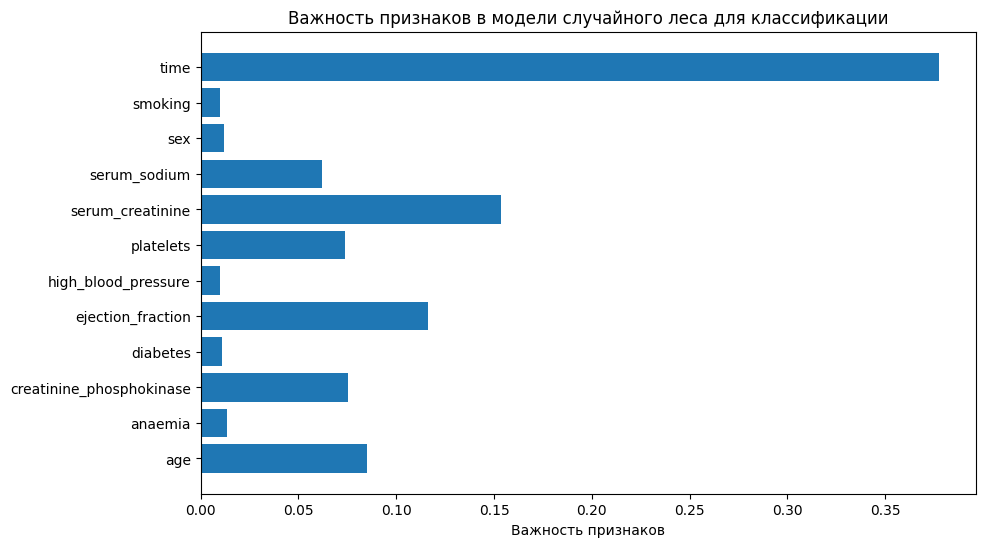

In [ ]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Случайный лес
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели на тестовых данных: {accuracy:.4f}")
print("\nКлассификационный отчет:\n", classification_report(y_test, y_pred))

feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Важность признаков')
plt.title('Важность признаков в модели случайного леса для классификации')
plt.show()


•	Градиентный бустинг

Точность модели на тестовых данных: 0.7333

Классификационный отчет:
               precision    recall  f1-score   support

           0       0.72      0.89      0.79        35
           1       0.76      0.52      0.62        25

    accuracy                           0.73        60
   macro avg       0.74      0.70      0.71        60
weighted avg       0.74      0.73      0.72        60



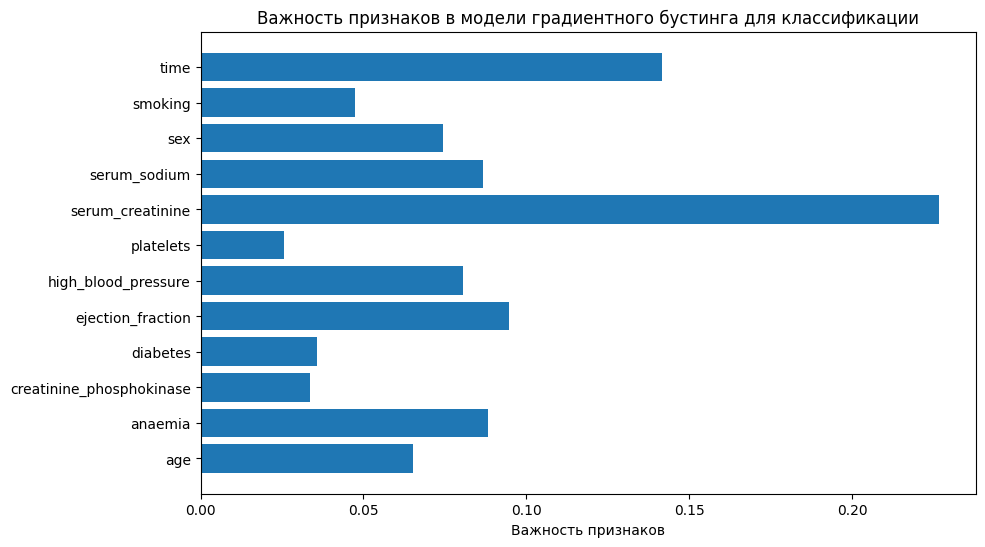

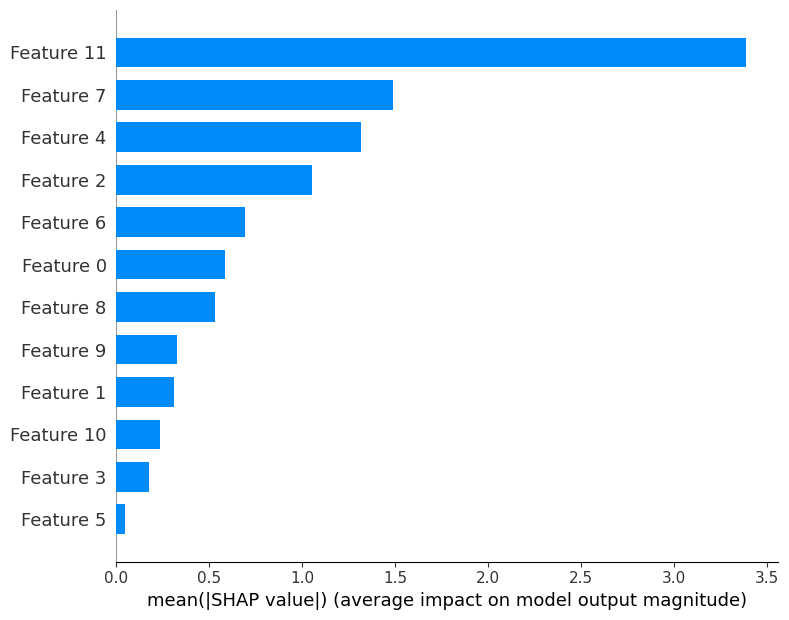

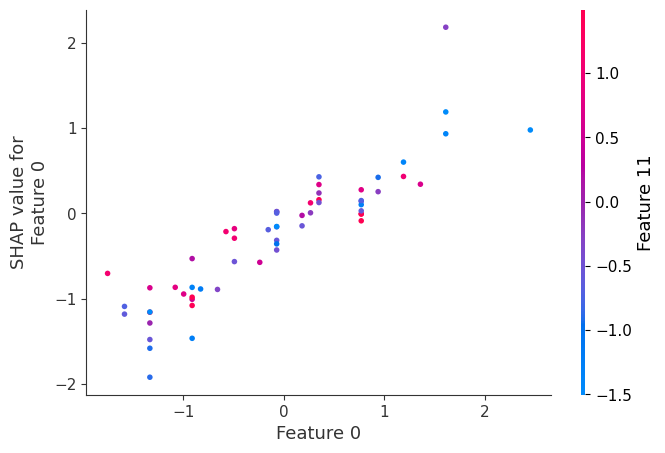

In [ ]:
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Градиентный бустинг
xgb_model = XGBClassifier(n_estimators=1000, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели на тестовых данных: {accuracy:.4f}")
print("\nКлассификационный отчет:\n", classification_report(y_test, y_pred))

feature_importances = xgb_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Важность признаков')
plt.title('Важность признаков в модели градиентного бустинга для классификации')
plt.show()

#SHAP анализ
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.dependence_plot("Feature 0", shap_values, X_test)

5.	Снижение размерности и визуализация данных:
•	Применить метод PCA, обучить модель на преобразованных признаках.



In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#Применим PCA для снижения размерности до 2 компонент у случайного леса
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

rf_model_pca = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model_pca.fit(X_train_pca, y_train)
y_pred_pca = rf_model_pca.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Точность модели на тестовых данных (PCA) случайного леса: {accuracy_pca:.4f}")
print("\nКлассификационный отчет случайного леса:\n", classification_report(y_test, y_pred_pca))

# Применим PCA для снижения размерности для градиентного бустинга до 2 компонент
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier(n_estimators=1000, random_state=42)
xgb_model.fit(X_train_pca, y_train)
y_pred_xgb = xgb_model.predict(X_test_pca)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Точность модели на тестовых данных (PCA) градиентного бустинга: {accuracy_xgb:.4f}")
print("\nКлассификационный отчет градиентного бустинга:\n", classification_report(y_test, y_pred_xgb))

Точность модели на тестовых данных (PCA) случайного леса: 0.6500

Классификационный отчет случайного леса:
               precision    recall  f1-score   support

           0       0.67      0.80      0.73        35
           1       0.61      0.44      0.51        25

    accuracy                           0.65        60
   macro avg       0.64      0.62      0.62        60
weighted avg       0.64      0.65      0.64        60

Точность модели на тестовых данных (PCA) градиентного бустинга: 0.6500

Классификационный отчет градиентного бустинга:
               precision    recall  f1-score   support

           0       0.68      0.77      0.72        35
           1       0.60      0.48      0.53        25

    accuracy                           0.65        60
   macro avg       0.64      0.63      0.63        60
weighted avg       0.64      0.65      0.64        60



•	Визуализировать данные с помощью t-SNE или UMAP.

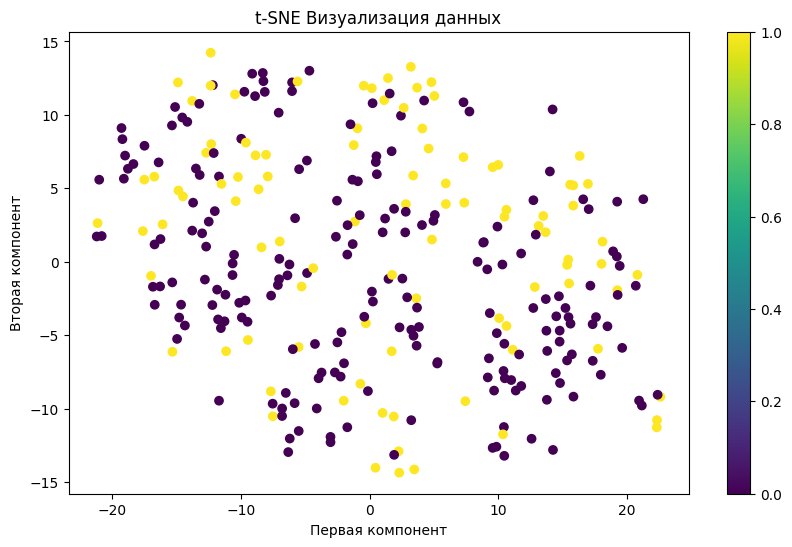

In [ ]:
from sklearn.manifold import TSNE

#Применим t-SNE для визуализации данных
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Визуализация данных')
plt.xlabel('Первая компонент')
plt.ylabel('Вторая компонент')
plt.show()
